In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modeling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### EDA

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
set(dataset['Tenure'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [5]:
dataset.shape

(10000, 14)

In [6]:
dataset['Balance'][dataset.Exited==1].shape

(2037,)

In [7]:
dataset['Balance'][dataset.Exited==1]

0            0.00
2       159660.80
5       113755.78
7       115046.74
16      132602.88
22           0.00
30           0.00
35      134264.04
41      122522.32
43      131394.56
46      112045.67
47      137843.80
53      125561.97
54       98495.72
58           0.00
70      133745.44
81           0.00
86      121681.82
88           0.00
90           0.00
104          0.00
105     107073.27
109      92833.89
114     154475.54
118     107818.63
125     152603.45
126          0.00
127     148507.24
138     213146.20
139     129490.36
          ...    
9832    105736.32
9834     62212.29
9838    121523.51
9852    104533.24
9856    108465.65
9858    120105.43
9859    129646.91
9863    131433.33
9877    106506.77
9879    118356.89
9882    105229.72
9884         0.00
9895    127585.98
9898         0.00
9905     93925.30
9910    118793.60
9917    117005.55
9920    204510.94
9924    107959.39
9934    118588.83
9947     83503.11
9956     85216.61
9960    104552.72
9962         0.00
9975    11

In [8]:
dataset['Balance'][dataset.Exited==1][dataset['Balance'][dataset.Exited==1] == 0 ].shape

(500,)

In [9]:
set(dataset['NumOfProducts'])

{1, 2, 3, 4}

### Preprocessing

In [10]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [11]:
X.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


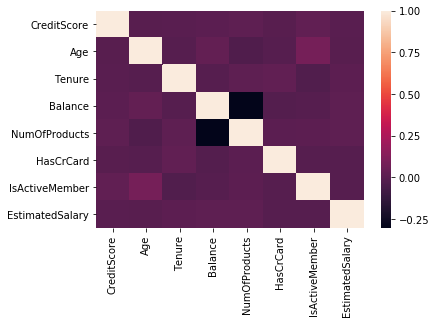

In [12]:
sns.heatmap(X.corr())

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
X = pd.get_dummies(data=X, columns=['Geography', 'Gender'], drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
## Same can be done like this too - using pandas
# for column in ['Geography', 'Gender']:
#     dummies = pd.get_dummies(X[column])
#     X[dummies.columns] = dummies
# X.drop(['Geography', 'Gender'], axis = 1)

In [16]:
## scikit-learn lower?!! use OneHotEncoder as below

# # Encoding categorical data
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# label_encoder = LabelEncoder()
# X[:, 1] = label_encoder.fit_transform(X[:, 1])
# X

# X.shape

# X[:, 2] = label_encoder.fit_transform(X[:, 2])
# X

# X.shape

# X[:, 4] = label_encoder.fit_transform(X[:, 4])
# X

# X.shape

# set(X[:,1])

# onehotencoder = OneHotEncoder(categorical_features = [1])
# X = onehotencoder.fit_transform(X).toarray()
# X = X[:, 1:]
# X

# set(X[:,7])

# X.shape

# onehotencoder = OneHotEncoder(categorical_features = [7])
# X = onehotencoder.fit_transform(X).toarray()
# X = X[:, 1:]
# X

# X.shape

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.15, random_state = 42)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 42)

### ANN Model 

In [20]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 32, init = 'normal', activation = 'relu', input_dim = X.shape[1]))

classifier.add(Dropout(.4))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 64, init = 'normal', activation = 'relu'))

classifier.add(Dropout(.4))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'normal', activation = 'sigmoid'))

C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf35\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, kernel_initializer="normal", input_dim=11, activation="relu")`
C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf35\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=64, kernel_initializer="normal", activation="relu")`
C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf35\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="normal", activation="sigmoid")`


In [22]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                384       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [24]:
print('\n\n {a[0]} = {}\n {a[1]} = {}'.format(*classifier.evaluate(X.values,y.values), a = classifier.metrics_names))

 9376/10000 [===========================>..] - ETA: 0s

 loss = 12.463179602050781
 acc = 0.2042


In [25]:
#Check available devices for model training
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13765048856201485376, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14519500
 locality {
   bus_id: 1
 }
 incarnation: 15004529333702082712
 physical_device_desc: "device: 0, name: Quadro K2200, pci bus id: 0000:04:00.0, compute capability: 5.0"]

### Training

In [26]:
y_train.shape

(7225,)

In [27]:
# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 32, nb_epoch = 20, 
                         validation_data=(X_val, y_val), verbose=1)

C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf35\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 7225 samples, validate on 1275 samples
Epoch 1/20
7225/7225 [==============================] - 1s - loss: 0.5019 - acc: 0.7910 - val_loss: 0.4549 - val_acc: 0.7804
Epoch 2/20
7225/7225 [==============================] - 1s - loss: 0.4342 - acc: 0.8030 - val_loss: 0.4374 - val_acc: 0.8055
Epoch 3/20
7225/7225 [==============================] - 1s - loss: 0.4221 - acc: 0.8238 - val_loss: 0.4189 - val_acc: 0.8314
Epoch 4/20
7225/7225 [==============================] - 1s - loss: 0.4093 - acc: 0.8322 - val_loss: 0.3985 - val_acc: 0.8486
Epoch 5/20
7225/7225 [==============================] - 1s - loss: 0.4042 - acc: 0.8378 - val_loss: 0.3881 - val_acc: 0.8549
Epoch 6/20
7225/7225 [==============================] - 1s - loss: 0.3891 - acc: 0.8383 - val_loss: 0.3710 - val_acc: 0.8557
Epoch 7/20
7225/7225 [==============================] - 1s - loss: 0.3908 - acc: 0.8397 - val_loss: 0.3734 - val_acc: 0.8565
Epoch 8/20
7225/7225 [==============================] - 1s - loss: 0.3872 - a

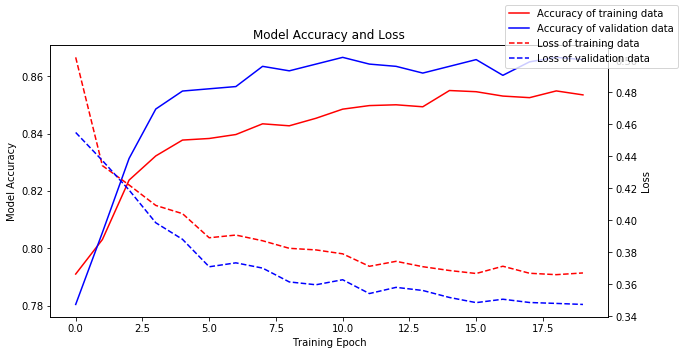

In [28]:
#Plot with twin axis

fig, ax1 = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
plt.title('Model Accuracy and Loss')


ax1.plot(history.history['acc'], 'r', label='Accuracy of training data')
ax1.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')

ax1.set_xlabel('Training Epoch')
ax1.set_ylabel('Model Accuracy')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(history.history['loss'], 'r--', label='Loss of training data')
ax2.plot(history.history['val_loss'], 'b--', label='Loss of validation data')


ax2.set_ylabel('Loss')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')


fig.legend()
plt.show()

In [29]:
##Basic Plot
# plt.figure(figsize=(12, 8))
# plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
# plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
# plt.plot(history.history['loss'], 'r--', label='Loss of training data')
# plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
# plt.title('Model Accuracy and Loss')
# plt.ylabel('Accuracy and Loss')
# plt.xlabel('Training Epoch')
# plt.ylim(0.2,1)
# plt.legend()
# plt.show()

### Predict using the trained model

In [30]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

### Confusion Matrix

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1158,   49],
       [ 165,  128]], dtype=int64)

### Accuracy

In [32]:
(cm[0][0]+ cm[1][1]) /np.sum(cm)

0.8573333333333333

### Save the model to disk

In [33]:
# serialize model to JSON
model_json = classifier.to_json()
with open("./checkpoint/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("./checkpoint/model.h5")
print("Saved model to disk")

Saved model to disk


In [34]:
from keras.models import model_from_json

In [35]:
# load json and create model
json_file = open('./checkpoint/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./checkpoint/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [36]:
# Predicting the Test set results
y_pred = loaded_model.predict(X_test)
y_pred = (y_pred > 0.5)

In [37]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1158,   49],
       [ 165,  128]], dtype=int64)